In [29]:
from typing import Annotated

from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_community.tools import DuckDuckGoSearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


tool = TavilySearchResults(max_results=2)
#tool = DuckDuckGoSearchResults(max_results=2)
weather=tool.invoke("What is the weather in New York?")
print(weather)

tools = [tool]
llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    result = llm_with_tools.invoke(state["messages"])
    return {"messages": [result]}
    #eturn {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")
graph = graph_builder.compile()

[{'title': 'Weather in New York', 'url': 'https://www.weatherapi.com/', 'content': "{'location': {'name': 'New York', 'region': 'New York', 'country': 'United States of America', 'lat': 40.7142, 'lon': -74.0064, 'tz_id': 'America/New_York', 'localtime_epoch': 1741457950, 'localtime': '2025-03-08 13:19'}, 'current': {'last_updated_epoch': 1741457700, 'last_updated': '2025-03-08 13:15', 'temp_c': 6.1, 'temp_f': 43.0, 'is_day': 1, 'condition': {'text': 'Sunny', 'icon': '//cdn.weatherapi.com/weather/64x64/day/113.png', 'code': 1000}, 'wind_mph': 19.9, 'wind_kph': 32.0, 'wind_degree': 310, 'wind_dir': 'NW', 'pressure_mb': 1004.0, 'pressure_in': 29.66, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 22, 'cloud': 0, 'feelslike_c': 1.3, 'feelslike_f': 34.4, 'windchill_c': 3.7, 'windchill_f': 38.7, 'heatindex_c': 7.7, 'heatindex_f': 45.9, 'dewpoint_c': -5.8, 'dewpoint_f': 21.5, 'vis_km': 16.0, 'vis_miles': 9.0, 'uv': 3.4, 'gust_mph': 22.9, 'gust_kph': 36.9}}", 'score': 0.8537286}, {'title': '10

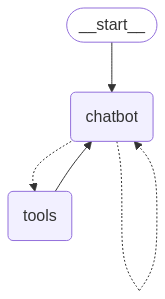

In [30]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [31]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: What do you know about LangGraph?
Assistant: 
Assistant: [{"title": "langchain-ai/langgraph: Build resilient language agents as graphs.", "url": "https://github.com/langchain-ai/langgraph", "content": "GitHub - langchain-ai/langgraph: Build resilient language agents as graphs. LangGraph is a library for building stateful, multi-actor applications with LLMs, used to create agent and multi-agent workflows. Let's build a tool-calling ReAct-style agent that uses a search tool! The simplest way to create a tool-calling agent in LangGraph is to use create_react_agent: Define the tools for the agent to use Define the tools for the agent to use This means that after tools is called, agent node is called next. workflow.add_edge(\"tools\", 'agent') Normal edge: after the tools are invoked, the graph should always return to the agent to decide what to do next LangGraph adds the input message to the internal state, then passes the state to the entrypoint node, \"agent\".", "score": 0.8987045

KeyError: '__end__'

In [1]:
from langchain_community.tools import TavilySearchResults

tool = TavilySearchResults(
    max_results=5,
    search_depth="advanced",
    include_answer=True,
    include_raw_content=True,
    include_images=True,
    # include_domains=[...],
    # exclude_domains=[...],
    # name="...",            # overwrite default tool name
    # description="...",     # overwrite default tool description
    # args_schema=...,       # overwrite default args_schema: BaseModel
)

In [2]:
tool.invoke({"query": "What happened at the last wimbledon"})



[{'title': 'Wimbledon Championships - Wikipedia',
  'url': 'https://en.wikipedia.org/wiki/Wimbledon_Championships',
  'content': "Wimbledon ChampionshipsOfficial websiteFounded1877; 148\xa0years ago\xa0(1877)Editions137 (2024)LocationLondonEngland, United KingdomVenueAll England Lawn Tennis and Croquet ClubWorple Road (1877–1921)Church Road (since 1922)SurfaceGrass outdoors[a]Prize money£50,000,000 (2024)Men'sDrawS (128Q) / 64D (16Q)[b]Current championsCarlos Alcaraz (singles)Harri HeliövaaraHenry Patten (doubles)Most singles titlesRoger Federer (8)Most doubles titlesTodd Woodbridge (9)Women'sDrawS (128Q) / 64D (16Q)Current championsBarbora Krejčíková (singles)Kateřina SiniakováTaylor Townsend (doubles)Most singles titlesMartina Navratilova (9)Most doubles titlesElizabeth Ryan (12)Mixed doublesDraw32Current championsJan ZielińskiHsieh Su-weiMost titles (male)Leander Paes (4)Vic Seixas (4)Owen Davidson (4)Ken Fletcher (4)Most titles (female)Elizabeth Ryan (7)Grand SlamAustralian OpenFre

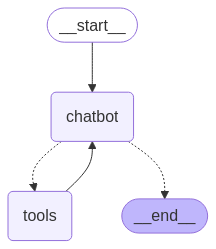

Assistant: Hello! How can I assist you today?
Assistant: I'm just a computer program, so I don't have feelings, but I'm here to help you! How can I assist you today?
Assistant: The capital of India is New Delhi.
Assistant: Machine learning is a subfield of artificial intelligence (AI) that focuses on the development of algorithms and statistical models that enable computers to learn and make decisions without being explicitly programmed to perform specific tasks. Here's a breakdown of key points about machine learning:

1. **Data-Driven**: Machine learning algorithms build a model based on sample data, known as training data, in order to make predictions or decisions without being explicitly programmed to perform a task.

2. **Types of Learning**:
   - **Supervised Learning**: The algorithm learns from labeled data, using input-output pairs to learn the relationship between them. Common tasks include classification and regression.
   - **Unsupervised Learning**: The algorithm learns fr

In [19]:
from typing import Annotated

from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_community.tools import DuckDuckGoSearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


#tool = TavilySearchResults(max_results=2)
tool = DuckDuckGoSearchResults(max_results=2)

tools = [tool]
llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")
graph = graph_builder.compile()
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        if not event.values():
            continue  # Skip if there are no values in the event
        for value in event.values():
            if "messages" in value and value["messages"]:
                print("Assistant:", value["messages"][-1].content)
            else:
                print("Assistant: No response generated.")


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except Exception as e:
        print(f"An error occurred: {e}")
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break